In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.Datasets.PeriodicCurvesDataset import PeriodicCurvesDataset

total_length = 6000

data = PeriodicCurvesDataset.load_univariate(len_timeseries=total_length, A1=5, A2=100, A3=3)


In [2]:
data.ids.shape, data.values.shape, data.dates.shape

((1,), (1, 6000), (6000,))

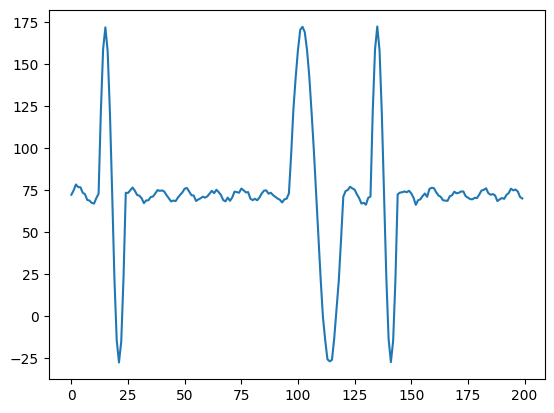

In [3]:
plt.plot(data.values[0, :200])

In [4]:
data = PeriodicCurvesDataset.load_multivariate(len_timeseries=total_length, n_timeseries=8)

data.ids.shape, data.values.shape, data.dates.shape

((8,), (8, 6000), (6000,))

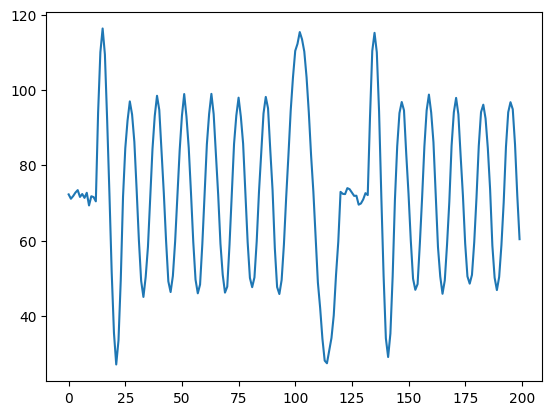

In [5]:
plt.plot(data.values[2, :200])

In [6]:
train, test = data.split(4500)

train.values.shape, test.values.shape

((8, 4500), (8, 1500))

In [10]:
from src.sampler import TimeseriesSampler

sampler = TimeseriesSampler(timeseries=train.values, batch_size=32, insample_size=3*100, outsample_size=100, window_sampling_limit=5*100)

In [11]:
insample, insample_mask, outsample, outsample_mask = next(iter(sampler))

insample.shape, insample_mask.shape, outsample.shape, outsample_mask.shape

((32, 300), (32, 300), (32, 100), (32, 100))

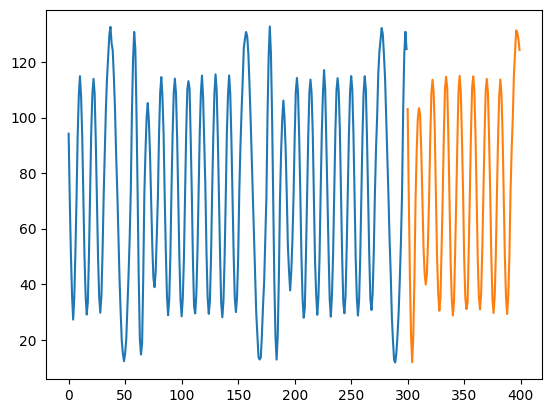

In [15]:
plt.plot(range(300), insample[0, :])
plt.plot(range(300, 400), outsample[0, :])